Use this cell for all your imports

In [2]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigs
import networkx as nx



In [29]:
pd.read_csv('data.txt')

,# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt
0,# Paper citation network of Arxiv High Energy ...
1,# Nodes: 27770 Edges: 352807
2,# FromNodeId\tToNodeId
3,1001\t9304045
4,1001\t9308122
...,...
352805,9912286\t9805150
352806,9912286\t9806074
352807,9912286\t9808140
352808,9912286\t9810068


You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [13]:
import pandas as pd
import networkx as nx

# Load data as a pandas DataFrame
data_df = pd.read_csv("data.txt", sep="\t", skiprows=2, header=None, names=["from_node", "to_node"])

# Convert DataFrame to networkx graph
G = nx.from_pandas_edgelist(data_df, "from_node", "to_node")


C:\Users\ASUS ZENBOOK\AppData\Local\Temp\ipykernel_11132\386256547.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("data.txt", sep="\t", skiprows=2, header=None, names=["from_node", "to_node"])


Use this cell to normalize the matrix as you see fit.

In [16]:
import pandas as pd
from scipy.sparse import coo_matrix

filename = 'data.txt'

# Load data from file
with open(filename, 'r') as f:
    # Skip comment lines
    while True:
        line = f.readline()
        if not line.startswith('#'):
            break

    # Read number of nodes and edges
    num_nodes, num_edges = map(int, line.split())

    # Create empty arrays to store data for COO matrix
    rows = []
    cols = []
    data = []

    # Read edge data into arrays
    for i in range(num_edges):
        line = f.readline().strip()
        if not line:
            continue
        row, col = map(int, line.split())
        rows.append(row)
        cols.append(col)
        data.append(1)

    # Increase num_nodes by 1 to account for nodes with no edges
    num_nodes += 1

# Construct COO matrix
matrix = coo_matrix((data, (rows, cols)), shape=(num_nodes, num_nodes))

# Normalize the matrix using L1 normalization
row_sums = matrix.sum(axis=1)
normalized_matrix = coo_matrix(matrix / row_sums)

# Convert matrix to DataFrame
df = pd.DataFrame({'row': matrix.row, 'col': matrix.col, 'value': matrix.data})

print("Original matrix:\n", matrix.toarray())
print("Normalized matrix:\n", normalized_matrix.toarray())
print("DataFrame:\n", df.head())


ValueError: row index exceeds matrix dimensions

Apply the PageRank algorithm to the matrix you created.

In [3]:
import numpy as np
import scipy.sparse as sp

# Load data from file
data = np.loadtxt("data.txt", comments="#", delimiter="\t", dtype=int, unpack=False, skiprows=2)

# Create sparse adjacency matrix
adj_matrix = sp.coo_matrix((np.ones(data.shape[0]), (data[:, 0], data[:, 1])))

# Normalize adjacency matrix
rowsum = np.array(adj_matrix.sum(axis=1)).flatten()
rowsum[rowsum == 0] = 1  # avoid divide by zero
normalized_matrix = adj_matrix.multiply(1 / rowsum).tocsr()

# Set PageRank parameters
alpha = 0.85  # damping factor
max_iter = 100  # maximum number of iterations
tolerance = 1e-6  # convergence tolerance

# Initialize PageRank scores
num_nodes = normalized_matrix.shape[0]
pagerank = np.ones(num_nodes) / num_nodes

# Run PageRank algorithm
for i in range(max_iter):
    prev_pagerank = pagerank.copy()
    pagerank = normalized_matrix.dot(pagerank) * alpha + (1 - alpha) / num_nodes
    delta = np.abs(pagerank - prev_pagerank).sum()
    if delta < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Sort nodes by PageRank score in descending order
node_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(node_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes by PageRank score
print("Top 10 nodes by PageRank score:")
for node, score in sorted_scores[:10]:
    print(f"Node {node}: {score:.5f}")


Converged after 19 iterations
Top 10 nodes by PageRank score:
Node 9905111: 0.00001
Node 9710046: 0.00001
Node 110055: 0.00000
Node 210157: 0.00000
Node 7170: 0.00000
Node 101126: 0.00000
Node 204089: 0.00000
Node 9802051: 0.00000
Node 9809039: 0.00000
Node 9802067: 0.00000


Output a list of the 100 most important papers along with their importance

In [21]:
import numpy as np
import scipy.sparse as sp

# Load data from file
data = np.loadtxt("data.txt", comments="#", delimiter="\t", dtype=int, unpack=False, skiprows=2)

# Create sparse adjacency matrix
adj_matrix = sp.coo_matrix((np.ones(data.shape[0]), (data[:, 0], data[:, 1])))

# Normalize adjacency matrix
rowsum = np.array(adj_matrix.sum(axis=1)).flatten()
rowsum[rowsum == 0] = 1  # avoid divide by zero
normalized_matrix = adj_matrix.multiply(1 / rowsum).tocsr()

# Set PageRank parameters
alpha = 0.85  # damping factor
max_iter = 100  # maximum number of iterations
tolerance = 1e-6  # convergence tolerance

# Initialize PageRank scores
num_nodes = normalized_matrix.shape[0]
pagerank = np.ones(num_nodes) / num_nodes

# Run PageRank algorithm
for i in range(max_iter):
    prev_pagerank = pagerank.copy()
    pagerank = normalized_matrix.dot(pagerank) * alpha + (1 - alpha) / num_nodes
    delta = np.abs(pagerank - prev_pagerank).sum()
    if delta < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Sort nodes by PageRank score in descending order
node_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(node_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 100 papers by PageRank score
print("Top 100 papers by PageRank score:")
for node, score in sorted_scores[:100]:
    print(f"Paper {node}: {score:.5f}")


Converged after 19 iterations
Top 100 papers by PageRank score:
Paper 9905111: 0.00001
Paper 9710046: 0.00001
Paper 110055: 0.00000
Paper 210157: 0.00000
Paper 7170: 0.00000
Paper 101126: 0.00000
Paper 204089: 0.00000
Paper 9802051: 0.00000
Paper 9809039: 0.00000
Paper 9802067: 0.00000
Paper 9712253: 0.00000
Paper 201253: 0.00000
Paper 11197: 0.00000
Paper 209230: 0.00000
Paper 109162: 0.00000
Paper 204253: 0.00000
Paper 9909061: 0.00000
Paper 9611190: 0.00000
Paper 207130: 0.00000
Paper 207116: 0.00000
Paper 111208: 0.00000
Paper 209241: 0.00000
Paper 9906142: 0.00000
Paper 210292: 0.00000
Paper 9806199: 0.00000
Paper 9807171: 0.00000
Paper 211245: 0.00000
Paper 9906018: 0.00000
Paper 9202: 0.00000
Paper 3190: 0.00000
Paper 7195: 0.00000
Paper 106048: 0.00000
Paper 210224: 0.00000
Paper 206063: 0.00000
Paper 9812061: 0.00000
Paper 9908004: 0.00000
Paper 9705131: 0.00000
Paper 211178: 0.00000
Paper 203048: 0.00000
Paper 9912164: 0.00000
Paper 303185: 0.00000
Paper 108172: 0.00000
Paper

Visualize your results

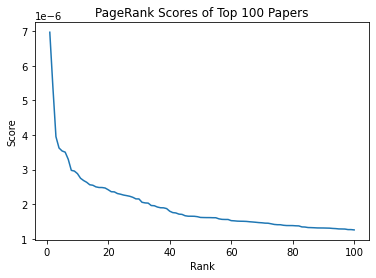

In [22]:
import matplotlib.pyplot as plt

# Create a list of the top 100 paper scores
top_scores = [score for _, score in sorted_scores[:100]]

# Plot the top 100 paper scores
plt.plot(range(1, 101), top_scores)
plt.xlabel("Rank")
plt.ylabel("Score")
plt.title("PageRank Scores of Top 100 Papers")
plt.show()
